In [8]:
# Stacked LSTM for international airline passengers problem with memory
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import os
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

581/581 - 5s - loss: 0.0276
581/581 - 1s - loss: 0.0184
581/581 - 2s - loss: 0.0180
581/581 - 2s - loss: 0.0176
581/581 - 2s - loss: 0.0170
581/581 - 2s - loss: 0.0163
581/581 - 2s - loss: 0.0155
581/581 - 1s - loss: 0.0148
581/581 - 1s - loss: 0.0142
581/581 - 1s - loss: 0.0137
581/581 - 2s - loss: 0.0132
581/581 - 2s - loss: 0.0128
581/581 - 2s - loss: 0.0124
581/581 - 2s - loss: 0.0120
581/581 - 1s - loss: 0.0117
581/581 - 1s - loss: 0.0114
581/581 - 1s - loss: 0.0111
581/581 - 1s - loss: 0.0108
581/581 - 2s - loss: 0.0105
581/581 - 2s - loss: 0.0103
581/581 - 2s - loss: 0.0101
581/581 - 2s - loss: 0.0099
581/581 - 2s - loss: 0.0098
581/581 - 2s - loss: 0.0097
581/581 - 2s - loss: 0.0096
581/581 - 2s - loss: 0.0096
581/581 - 2s - loss: 0.0095
581/581 - 2s - loss: 0.0095
581/581 - 2s - loss: 0.0095
581/581 - 2s - loss: 0.0094
581/581 - 2s - loss: 0.0094
581/581 - 2s - loss: 0.0094
581/581 - 2s - loss: 0.0094
581/581 - 2s - loss: 0.0094
581/581 - 2s - loss: 0.0094
581/581 - 2s - loss:

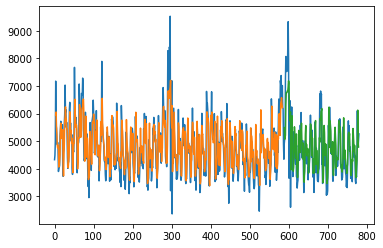

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
dataframe = pd.read_csv(os.path.basename(file), usecols = [1],
                      engine = "python")

# load the dataset
#dataframe = read_csv('Rossmann_Store1_Data_FULL.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [10]:
#Output to csv file
out = testPredict.astype(numpy.int)
pd.DataFrame(out).to_csv(r'C:\Users\gurpr\Videos\BetaSci\SLSTM_lookbackis3_pred.csv', index=False, header=False)
